In [21]:
import numpy as np 
import pandas as pd

from funcs.helper import get_tess_orbital_phases, get_cheops_orbital_phases

import matplotlib.pyplot as plt 

# set default matplotlib fontsize to 13
# plt.rcParams.update({'font.size': 13})



hip67522params = pd.read_csv("../data/hip67522_params.csv")

period = hip67522params[hip67522params.param=="orbper_d"].val.values[0]
midpoint = hip67522params[hip67522params.param=="midpoint_BJD"].val.values[0]
teff = hip67522params[hip67522params.param=="teff_K"].val.values[0]
tefferr = hip67522params[hip67522params.param=="teff_K"].err.values[0]
radius = hip67522params[hip67522params.param=="radius_rsun"].val.values[0]
radiuserr = hip67522params[hip67522params.param=="radius_rsun"].err.values[0]


# ----------------------------------------------------------------------------------------




In [22]:
phases = np.array([0.61248919, 0.81165721, 0.01788908, 0.0296636,  0.05760315, 0.04067287,
 0.73005547, 0.94878914, 0.11323833, 0.20031473, 0.15087211, 0.04514247,
 0.02527212, 0.05657772, 0.06247738, ])


masks = [(0.015, 0.065),(0.01, 0.08), (0.0, 0.1)]
# masks = [(0.1,0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,0.6), (0.6,0.7), (0.7,0.8), (0.8,0.9), (0.9,1.0)]
# masks = [(phases > 0.01) & (phases < 0.07), (phases > 0.015) & (phases < 0.065) , phases < 0.1, (phases < 0.12) & (phases < 0.92) ]
# basemasks = [~m for m in masks]
# basemasks = [(phases < 0.015) | (phases > 0.065), (phases > 0.1), , (phases < 0.12) & (phases < 0.92) ]
# factors = [1/0.6, 2, 1, 0.5]


Number of flares in selected phase range: 8
Number of flares in base phase range: 7
Rate in base phase range: 0.10 1/day
Time in base phase range: 66.92 days
Flare in selected phase range: 1.27 1/day
Time in selected phase range: 6.29 days
1.0


/tmp/ipykernel_38140/3484674962.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  posterior = np.array([np.power(rate * time, x) * np.exp(-rate * time) / np.math.factorial(x) for rate in rates]) #/ np.sqrt(rate)


Number of flares in selected phase range: 8
Number of flares in base phase range: 7
Rate in base phase range: 0.11 1/day
Time in base phase range: 64.56 days
Flare in selected phase range: 0.93 1/day
Time in selected phase range: 8.64 days
1.0


/tmp/ipykernel_38140/3484674962.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  posterior = np.array([np.power(rate * time, x) * np.exp(-rate * time) / np.math.factorial(x) for rate in rates]) #/ np.sqrt(rate)


Number of flares in selected phase range: 8
Number of flares in base phase range: 7
Rate in base phase range: 0.11 1/day
Time in base phase range: 61.85 days
Flare in selected phase range: 0.70 1/day
Time in selected phase range: 11.36 days
1.0


/tmp/ipykernel_38140/3484674962.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  posterior = np.array([np.power(rate * time, x) * np.exp(-rate * time) / np.math.factorial(x) for rate in rates]) #/ np.sqrt(rate)


Text(0.55, 0.05, 'selected phase range flares')

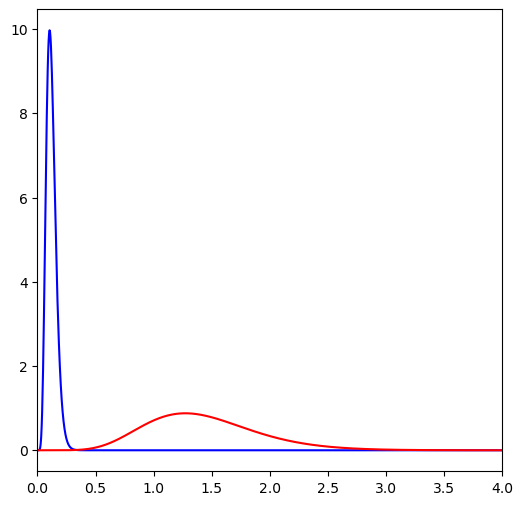

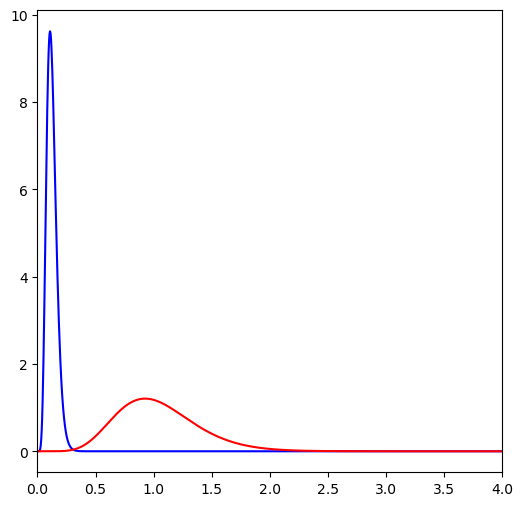

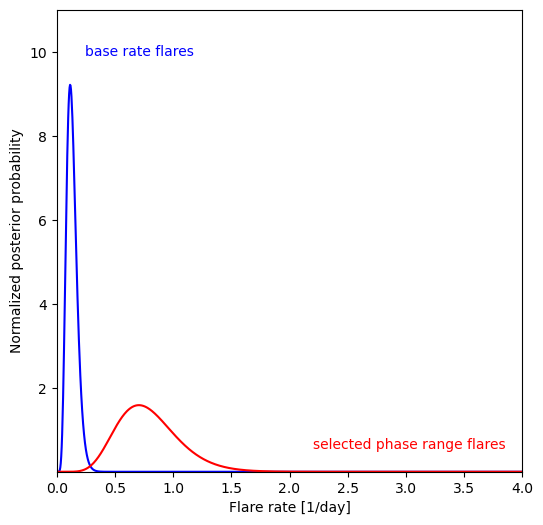

In [23]:
# phase selection
selection_name = [
                  "Clustering in phase range 0.015-0.065",
                  "Clustering in phase range 0.01-0.08",
                  "Clustering in phase range 0.0-0.1",
                 ]

selection_name = [f"Clustering in phase range {mask[0]}-{mask[1]}" for mask in masks]

def poisson(rates, x, time):
    posterior = np.array([np.power(rate * time, x) * np.exp(-rate * time) / np.math.factorial(x) for rate in rates]) #/ np.sqrt(rate)

    norm = np.trapz(posterior, rates)

    return posterior / norm

for i, (label, mask) in enumerate(list(zip(selection_name, masks))):

    plt.figure(figsize=(6,6))


    flaremask = (phases > mask[0]) & (phases < mask[1])

    selphases = phases[flaremask]
    nsel = len(selphases)

    nbase = len(np.where(~flaremask)[0])
    # dtime = (6.95 + 4.41) / factor # 6.95 days of TESS data, 4.41 days of CHEOPS data in the 0-0.1 phase range
    # dbase = (23396.000000 + 36408.000000 + 34634.000000 + 10980.333333)  / 60 / 24 - dtime


    # GET OBSERVED CHEOPS PHASES --------------------------------------------------------------

    cheops_phases, tcheops01, tcheops09, tot_obs_time_d_cheops = get_cheops_orbital_phases(period, midpoint, split=0.1, usemask=True, mask=mask)


    # GET OBSERVED TESS PHASES ---------------------------------------------------------------

    tess_phases, ttess01, ttess09, ttess = get_tess_orbital_phases(period, split=0.1, by_sector=False, usemask=True, mask=mask) 

    dtime = tcheops01 + ttess01
    dbase = tcheops09 + ttess09


    print(f"Number of flares in selected phase range: {nsel}")
    print(f"Number of flares in base phase range: {nbase}")
    print(f"Rate in base phase range: {nbase/dbase:.2f} 1/day")
    print(f"Time in base phase range: {dbase:.2f} days")

    print(f"Flare in selected phase range: {nsel/dtime:.2f} 1/day")
    print(f"Time in selected phase range: {dtime:.2f} days")



    rates = np.linspace(0, 4, 1000)

    y1new = poisson(rates, nbase, dbase)
    y2new = poisson(rates, nsel, dtime)


    plt.plot(rates, y1new, label="Flares (interpolated)", c="b")
    plt.plot(rates, y2new, label="Selected (interpolated)", c="r")

    # where does y1new and y2new intersect?

    arginter = np.argwhere(np.diff(np.sign(y1new - y2new))).flatten()[0]

    # plt.axvline(rates[arginter], color="black", linestyle="--", label="Intersection")

    yintersect = np.append(y2new[:arginter], y1new[arginter:])

    # plt.plot(rates, yintersect, label="Intersection", zorder=10, c="g")

    # get area under the curve for y1new and y2new and yintersect
    area1 = np.trapz(y1new, rates)
    area2 = np.trapz(y2new, rates)
    areaintersect = np.trapz(yintersect, rates)

    # highlight the area und yintersect
    # plt.fill_between(rates, 0, yintersect, color="g", alpha=0.35)

    frac =  areaintersect / area2
    frac2 = areaintersect / area1
    plt.xlim(0, 4)
    print(frac2)
    # plt.text(0.41, 0.7 + i/10, f"{label}:\n Probablity of being in the overlap: {frac2*100:.2f}%", transform=plt.gca().transAxes, color="g") 

# plt.legend()
plt.xlabel("Flare rate [1/day]")
plt.ylabel("Normalized posterior probability")
plt.ylim(1e-3,11)
# plt.yscale("log")
plt.text(0.06, 0.9, "base rate flares", transform=plt.gca().transAxes, color="b")
plt.text(0.55, 0.05, "selected phase range flares", transform=plt.gca().transAxes, color="r")